### Tyson Paper

In [1]:
#Libraries
import pandas as  pd
import numpy as np
from pylab import *
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.integrate import odeint

from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy as sp

#### 1A. Ordered distributive mechanism

In [2]:
def nCk(n,k):
    return exp(log(gamma(n+1))-log(gamma(k+1))-log(gamma(n-k+1)))

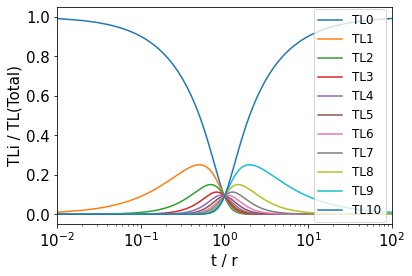

In [27]:
def TLi_TLT():
    N = 10 # Telomere length states
    tbyr = np.linspace(0,100,10000)
    for i in range(N+1):
        r = tbyr**i*(1-tbyr)/(1 - tbyr**(N+1))
        plt.plot(tbyr,r,label='TL'+str(i))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 1A:Distributive Ordered Mechanism',fontsize=15)
    #plt.xticks([0.01,0.1,1,10,100])
    plt.legend(loc='center right',fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0.01,100])
    plt.show()
TLi_TLT()

#### 1B. Disordered distributive mechanism

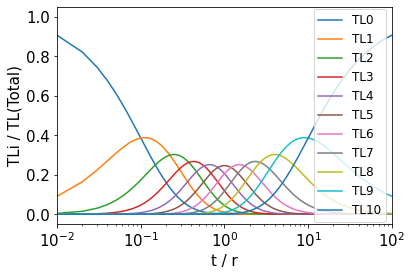

In [28]:
def TLi_TLTD():
    N = 10 # phosphorylation sites on X
    tbyr = np.arange(0,100,0.01)
    for i in range(N+1):
        r = nCk(N,i)*tbyr**i/(1 + tbyr)**N
        plt.plot(tbyr,r,label='TL'+str(i))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize = 15)
    #plt.title('Distributive Disordered Mechanism')
    #plt.xlim(0,10)
    plt.xscale('log')
    plt.legend(loc='center right',fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0.01,100])
    plt.show()
TLi_TLTD()

#### 2.2 Stepwise activity change of the Telomere Length states

#### Fig 2.a Ordered mechanisms

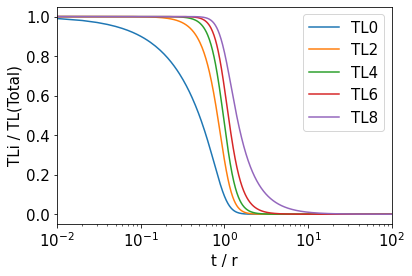

In [29]:
def TLa_TLT():
    N = 10 # phosphorylation sites on X
    tbyr = np.linspace(0,100,10000)
    for q in range(0,9,2):

        r = (1-tbyr**(q+1))/(1 - tbyr**(N+1))
        plt.plot(tbyr,r,label='TL'+str(q))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 2b. Ordered Mechanism')
    #plt.xticks([0.01,0.1,1,10,100])
    plt.xlim(0.1,10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0.01,100])
    plt.legend(fontsize=15)
    plt.show()
TLa_TLT()

#### Fig 2.b Disordered

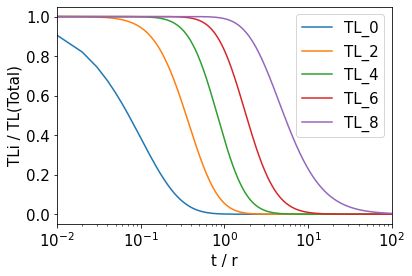

In [30]:
def TLb_TLT():
    N = 10 # phosphorylation sites on X
    tbyr = np.linspace(0,100,10000)
    for q in range(0,9,2):
        num = 0
        for j in range(0,q+1):
            num+=nCk(N,j)*(tbyr**j)
        r = num/((1 + tbyr)**N)
        plt.plot(tbyr,r,label='TL_'+str(q))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 2b. Disordered Mechanism')
    #plt.xticks([0.01,0.1,1,10,100])
    plt.xlim(0.01,100)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0.01,100])
    plt.legend(fontsize=15)
    plt.show()
TLb_TLT()

#### 3a. ordered mechanism

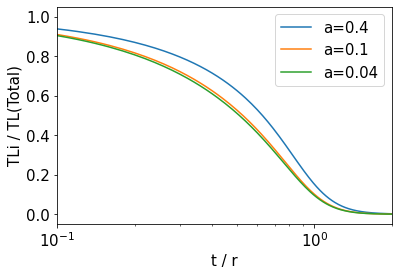

In [31]:
def TLalpha_TLT():
    N = 10 # phosphorylation sites on X
    
    tbyr = np.linspace(0,100,10000)
    omega = 1 # for a<0, a**(-N) for a>0
    for a in [0.4,0.1,0.04]:

        r = (1-(a*tbyr)**(N+1))*(1-tbyr)/((1 - tbyr**(N+1))*(1-a*tbyr))
        plt.plot(tbyr,r,label='a='+str(a))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 3a. Ordered Mechanism')
    #plt.xticks([0.01,0.1,1,10,100])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([0.01,100])
    plt.xlim(0.1,2)
    plt.legend(fontsize=15)
    plt.show()
TLalpha_TLT()

#### 3b. Disordered mechanism

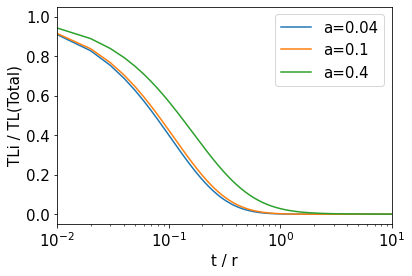

In [32]:
def TLOmega_TLT():
    N = 10 # phosphorylation sites on X
    
    tbyr = np.linspace(0,100,10000)
    omega = 1 # for a<0, a**(-N) for a>0
    for a in [0.04,0.1,0.4]:
        r = (1+a*tbyr)**N/(1+tbyr)**N
        plt.plot(tbyr,r,label='a='+str(a))
    plt.xlabel('t / r',fontsize=15)
    plt.ylabel('TLi / TL(Total)',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 3b. Disordered Mechanism')
    #plt.xticks([0.01,0.1,1,10,100])
    plt.xlim(0.01,10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.xlim([0.01,100])
    plt.legend(fontsize=15)
    plt.show()
TLOmega_TLT()

#### 2.5. Bistability by embedding TL in a double-negative feedback loop

#### fig 4a

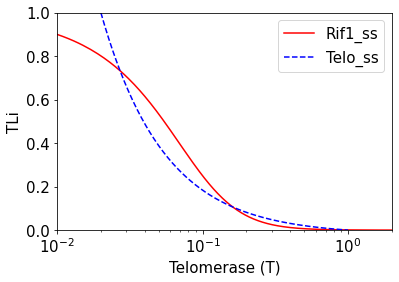

In [33]:
Ks = 0.02
Kd = 0.02
Ka = 0.98
XT = 1
N = 3
q = 0
r = 0.1 #for ordered and 0.5(disordered)


def TLss_4a():
    t = np.linspace(0,100,100000)
    Telo_ss = (1-t/r)/(1 - (t/r)**(N+1))
    T_ss = Ks/(Kd+Ka*Telo_ss)
    plt.plot(t,Telo_ss,'-r',label='Rif1_ss')
    plt.plot(T_ss,Telo_ss,'--b',label='Telo_ss')    
    plt.xlabel('Telomerase (T)',fontsize=15)
    plt.ylabel('TLi',fontsize=15)
    plt.xscale('log')
    #plt.title('Fig 4a. Ordered Mechanism')
    #plt.xticks([0.01,0.1,1,10,100])
    plt.xlim(0.01,2)
    plt.ylim(0,1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
TLss_4a()

#### Deterministic simulation case

In [54]:
Ks = 0.02; Kd = 0.02;Ka = 0.98
Xa = 1
K = 10; V = 200
H = 10
#XT = 20

X0 = 1
X1 = 1
X2 = 1
X3 = 1
X4 = 1
X5 = 1
X6 = 1
X7 = 1
X8 = 1
X9 = 1
X10= 1

init_c = [K,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]

def K_actV(x,t):
    K  = x[0]
    X0 = x[1]
    X1 = x[2]
    X2 = x[3]
    X3 = x[4]
    X4 = x[5]
    X5 = x[6]
    X6 = x[7]
    X7 = x[8]
    X8 = x[9]
    X9 = x[10]
    X10= x[11]
    
    #Xa = XT - (X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10)
    #Xa = X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10
    
    Xa = X0
    #Xa = X10
    #Xa = XT-X10
    
    dKdt =  Ks*V - (Kd+(Ka/V)*Xa)*K
    dX0dt = 1/V*(H*X1 - K*X0)
    dX1dt = 1/V*(K*X0 - (K+H)*X1 + H*X2)
    dX2dt = 1/V*(K*X1 - (K+H)*X2 + H*X3)
    dX3dt = 1/V*(K*X2 - (K+H)*X3 + H*X4)
    dX4dt = 1/V*(K*X3 - (K+H)*X4 + H*X5)
    dX5dt = 1/V*(K*X4 - (K+H)*X5 + H*X6)
    dX6dt = 1/V*(K*X5 - (K+H)*X6 + H*X7)
    dX7dt = 1/V*(K*X6 - (K+H)*X7 + H*X8)
    dX8dt = 1/V*(K*X7 - (K+H)*X8 + H*X9)
    dX9dt = 1/V*(K*X8 - (K+H)*X9 + H*X10)
    dX10dt= 1/V*(K*X9 - H*X10)
                 
    return dKdt,dX0dt,dX1dt,dX2dt,dX3dt,dX4dt,dX5dt,dX6dt,dX7dt,dX8dt,dX9dt,dX10dt


## TLi = TL0

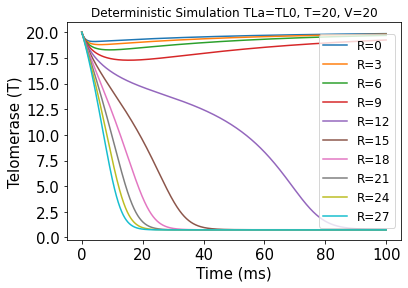

In [55]:
t = arange(0,100,0.01)
K = 20
V = 20
#H = 10
init_c = [K,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]
for Hi in range(0,30,3):
    H = Hi
    z = odeint(K_actV,init_c,t)
    plt.plot(t,z[:,0],label='R=%d'%Hi)
#plt.plot(t,z[:,1],'--k',label='X0')
#plt.plot(z[:,2],z[:,0],'--b',label='K')
#plt.plot(t,z[:,11],'--b',label='X10')
#plt.show()
# for ind in range(2,11):
#     plt.plot(t,z[:,ind],label='X%d'%(ind-1))
plt.title('Deterministic Simulation TLa=TL0, T=20, V=20')
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('Telomerase (T)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=12)
plt.show()

#### Kss at two different states Xa = X0, V = 200

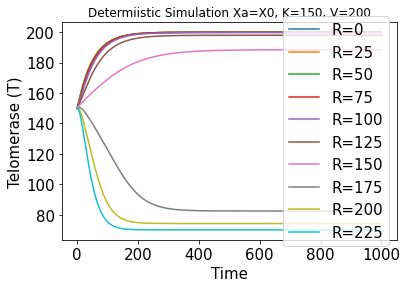

In [56]:
t = arange(0,1000,0.01)
K = 150
V = 200
#H = 50
init_c = [K,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]
for Hi in range(0,250,25):
    H = Hi
    z = odeint(K_actV,init_c,t)
    plt.plot(t,z[:,0],label='R=%d'%Hi)
#plt.plot(t,z[:,1],'--k',label='X0')
#plt.plot(z[:,2],z[:,0],'--b',label='K')
#plt.plot(t,z[:,11],'--b',label='X10')
#plt.show()
# for ind in range(2,11):
#     plt.plot(t,z[:,ind],label='X%d'%(ind-1))
plt.title('Determiistic Simulation Xa=X0, K=150, V=200')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Telomerase (T)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.show()

### Two mono cycles

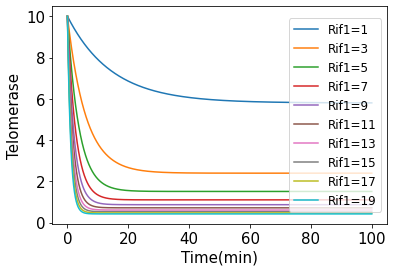

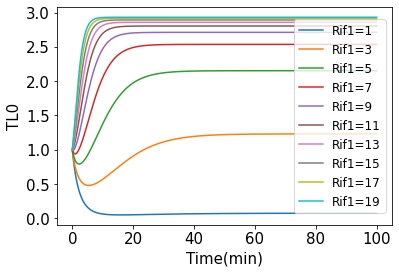

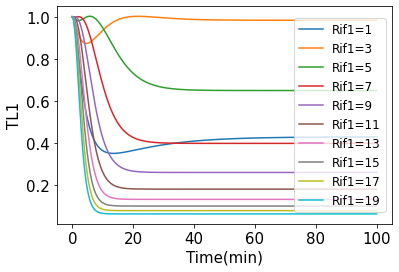

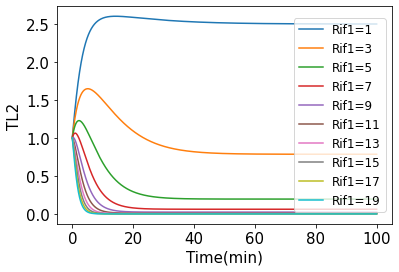

In [57]:
#Parameters
Ks = 0.02; Kd = 0.02;Ka = 0.98
K = 10 
V = 20
H = 10

T0 = 1
T1 = 1
T2 = 1

#Initial Condition
init_c = [K,T0,T1,T2]

def two_mono_Xa_H(x,t):
    K  = x[0]
    T0 = x[1]
    T1 = x[2]
    T2 = x[3]
    
    Xa = H
    
    dKdt =  Ks*V - (Kd+(Ka/V)*Xa)*K
    dT0dt = 1/V*(H*T1 - K*T0)
    dT1dt = 1/V*(K*T0 - (K+H)*T1 + H*T2)
    dT2dt = 1/V*(K*T1 - H*T2)
                 
    return dKdt,dT0dt,dT1dt,dT2dt

#plt.figure(figsize=(15,10))
#plt.suptitle('Two Mono Cycles Deterministic, Xa = H',fontsize=15)

t = arange(0,100,0.01)
K = 10
V = 20
#H = 10
init_c = [K,T0,T1,T2]

#plt.subplot(2,2,1)


for Hi in arange(1,21,2):
    H = Hi
    z = odeint(two_mono_Xa_H,init_c,t)
    plt.plot(t,z[:,0],label='Rif1=%d'%Hi)
plt.xlabel('Time(min)',fontsize=15)
plt.ylabel('Telomerase',fontsize=15)
plt.legend(loc='center right',fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('Telomerase dec as Rif1 inc',fontsize=15)
plt.show()

#plt.subplot(2,2,2)

for Hi in arange(1,21,2):
    H = Hi
    z = odeint(two_mono_Xa_H,init_c,t)
    plt.plot(t,z[:,1],label='Rif1=%d'%Hi)
plt.xlabel('Time(min)',fontsize=15)
plt.ylabel('TL0',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=12)
#plt.title('T0 Elongation',fontsize=15)
plt.show()


#plt.subplot(2,2,3)

for Hi in arange(1,21,2):
    H = Hi
    z = odeint(two_mono_Xa_H,init_c,t)
    plt.plot(t,z[:,2],label='Rif1=%d'%Hi)
plt.xlabel('Time(min)',fontsize=15)
plt.ylabel('TL1',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=12)
#plt.title('T1 Elongation/Shortening',fontsize=15)
plt.show()

#plt.subplot(2,2,4)

for Hi in arange(1,21,2):
    H = Hi
    z = odeint(two_mono_Xa_H,init_c,t)
    plt.plot(t,z[:,3],label='Rif1=%d'%Hi)
plt.xlabel('Time(min)',fontsize=15)
plt.ylabel('TL2',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=12)
#plt.title('T2 Shortening',fontsize=15)
plt.show()



### Ten Telomere states

In [58]:
#Parameters
Ks = 0.02; Kd = 0.02;Ka = 0.28
K = 10 
V = 200
H = 10

T0 = 30
T1 = 30
T2 = 30
T3 = 30
T4 = 30
T5 = 30
T6 = 30
T7 = 30
T8 = 30
T9 = 30
T10= 30

#Initial Condition
init_c = [K,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10]

def K_actV(x,t):
    K  = x[0]
    T0 = x[1]
    T1 = x[2]
    T2 = x[3]
    T3 = x[4]
    T4 = x[5]
    T5 = x[6]
    T6 = x[7]
    T7 = x[8]
    T8 = x[9]
    T9 = x[10]
    T10= x[11]
    
    Xa = T0
    
    dKdt =  Ks*V - (Kd+(Ka/V)*Xa)*K
    dT0dt = 1/V*(H*T1 - K*T0)
    dT1dt = 1/V*(K*T0 - (K+H)*T1 + H*T2)
    dT2dt = 1/V*(K*T1 - (K+H)*T2 + H*T3)
    dT3dt = 1/V*(K*T2 - (K+H)*T3 + H*T4)
    dT4dt = 1/V*(K*T3 - (K+H)*T4 + H*T5)
    dT5dt = 1/V*(K*T4 - (K+H)*T5 + H*T6)
    dT6dt = 1/V*(K*T5 - (K+H)*T6 + H*T7)
    dT7dt = 1/V*(K*T6 - (K+H)*T7 + H*T8)
    dT8dt = 1/V*(K*T7 - (K+H)*T8 + H*T9)
    dT9dt = 1/V*(K*T8 - (K+H)*T9 + H*T10)
    dT10dt= 1/V*(K*T9 - H*T10)
                 
    return dKdt,dT0dt,dT1dt,dT2dt,dT3dt,dT4dt,dT5dt,dT6dt,dT7dt,dT8dt,dT9dt,dT10dt


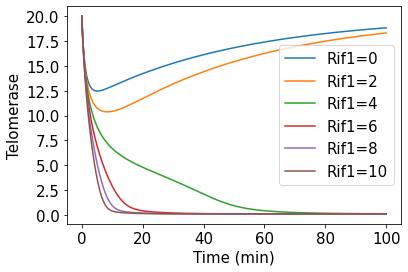

In [59]:
t = arange(0,100,0.01)
K = 20
V = 20
#H = 10
init_c = [K,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10]
for Hi in range(0,12,2):
    H = Hi
    z = odeint(K_actV,init_c,t)
    plt.plot(t,z[:,0],label='Rif1=%d'%Hi)
#plt.title('Figure 3.A Determiistic case Xa=X0, K=20, V=20')
plt.xlabel('Time (min)',fontsize=15)
plt.ylabel('Telomerase',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.show()

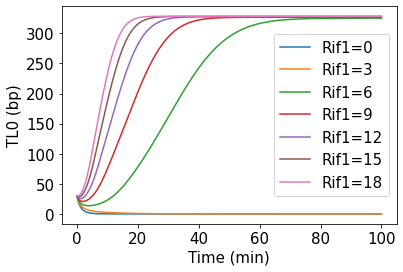

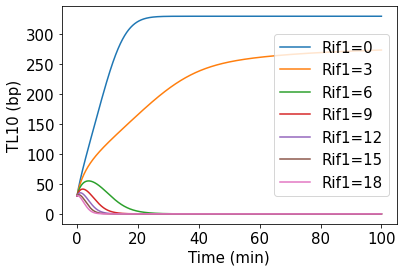

In [60]:
t = arange(0,100,0.01)
K = 20
V = 20
#H = 10
init_c = [K,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10]
for Hi in range(0,20,3):
    H = Hi
    z = odeint(K_actV,init_c,t)
    plt.plot(t,z[:,1],label='Rif1=%d'%Hi)
#plt.title('Figure 3.A Determiistic case Xa=X0, K=20, V=20')
plt.xlabel('Time (min)',fontsize=15)
plt.ylabel('TL0 (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.show()


t = arange(0,100,0.01)
K = 20
V = 20
#H = 10
init_c = [K,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10]
for Hi in range(0,20,3):
    H = Hi
    z = odeint(K_actV,init_c,t)
    plt.plot(t,z[:,11],label='Rif1=%d'%Hi)
#plt.title('Figure 3.A Determiistic case Xa=X0, K=20, V=20')
plt.xlabel('Time (min)',fontsize=15)
plt.ylabel('TL10 (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.show()

### Stochastic simulation

In [21]:
def stochas_KH(V_val,H_val,K_val,T_val):
    #parameters
    Ks = 0.02; Kd = 0.02;Ka = 0.98; N = 10
    XT = 20
    V = V_val

    K = K_val #(0-40)
    H = H_val #(0-20)
    #Xa = 2

    #X = 1
    X0 = 2
    X1 = 2
    X2 = 2
    X3 = 2
    X4 = 2
    X5 = 2
    X6 = 2
    X7 = 2
    X8 = 2
    X9 = 2
    X10 = 2

    T = T_val
    t = 0

    time = []
    mol_K = [] #no. of molecules of Kinase
    mol_H = [] #no. of molecules of Phosphatase
    mol_X0 = []
    mol_X1 = []
    mol_X2 = []
    mol_X3 = []
    mol_X4 = []
    mol_X5 = []
    mol_X6 = []
    mol_X7 = []
    mol_X8 = []
    mol_X9 = []
    mol_X10 = []

    while t<T:

        #rates = [Ks*V, Kd*K,(Ka/V)*Xa*K]
        Xa = X0

        rates = [Ks*V, Kd*K,(Ka/V)*Xa*K, 
                (1/V)*H*X1, (1/V)*K*X0,
                (1/V)*K*X0, (1/V)*(K+H)*X1,(1/V)*H*X2,
                (1/V)*K*X1, (1/V)*(K+H)*X2,(1/V)*H*X3,
                (1/V)*K*X2, (1/V)*(K+H)*X3,(1/V)*H*X4,
                (1/V)*K*X3, (1/V)*(K+H)*X4,(1/V)*H*X5,
                (1/V)*K*X4, (1/V)*(K+H)*X5,(1/V)*H*X6,
                (1/V)*K*X5, (1/V)*(K+H)*X6,(1/V)*H*X7,
                (1/V)*K*X6, (1/V)*(K+H)*X7,(1/V)*H*X8,
                (1/V)*K*X7, (1/V)*(K+H)*X8,(1/V)*H*X9,
                (1/V)*K*X8, (1/V)*(K+H)*X9,(1/V)*H*X10,
                (1/V)*K*X9, (1/V)*H*X10]
        
        
        rate_sum = sum(rates)
        #tau = np.random.exponential(scale=1/rate_sum)
        tau = -np.log(np.random.uniform(0,1))/rate_sum
        t+=tau     #time point of next event
        r = np.random.rand()*rate_sum     # rxn selection

        # Kinase Production
        if (r>0 and r<rates[0]):
            K +=1
        #Kinase Degradation
        elif(r>rates[0] and r<sum(rates[0:2])):
            K -=1
        elif(r>rates[1] and r<sum(rates[0:3])):
            K -=1
        elif(r>rates[2] and r<sum(rates[0:4])):
            X0 +=1    
        elif(r>rates[3] and r<sum(rates[0:5])):
            X0 -=1    

        elif(r>rates[4] and r<sum(rates[0:6])):
            X1 +=1    
        elif(r>rates[5] and r<sum(rates[0:7])):
            X1 -=1    
        elif(r>rates[6] and r<sum(rates[0:8])):
            X1 +=1
        
        elif(r>rates[7] and r<sum(rates[0:9])):
            X2 +=1    
        elif(r>rates[8] and r<sum(rates[0:10])):
            X2 -=1    
        elif(r>rates[9] and r<sum(rates[0:11])):
            X2 +=1
            
        elif(r>rates[10] and r<sum(rates[0:12])):
            X3 +=1    
        elif(r>rates[11] and r<sum(rates[0:13])):
            X3 -=1    
        elif(r>rates[12] and r<sum(rates[0:14])):
            X3 +=1

        elif(r>rates[13] and r<sum(rates[0:15])):
            X4 +=1    
        elif(r>rates[14] and r<sum(rates[0:16])):
            X4 -=1    
        elif(r>rates[15] and r<sum(rates[0:17])):
            X4 +=1
        
        elif(r>rates[16] and r<sum(rates[0:18])):
            X5 +=1    
        elif(r>rates[17] and r<sum(rates[0:19])):
            X5 -=1    
        elif(r>rates[18] and r<sum(rates[0:20])):
            X5 +=1

        elif(r>rates[19] and r<sum(rates[0:21])):
            X6 +=1    
        elif(r>rates[20] and r<sum(rates[0:22])):
            X6 -=1    
        elif(r>rates[21] and r<sum(rates[0:23])):
            X6 +=1            
        
        elif(r>rates[22] and r<sum(rates[0:24])):
            X7 +=1    
        elif(r>rates[23] and r<sum(rates[0:25])):
            X7 -=1    
        elif(r>rates[24] and r<sum(rates[0:26])):
            X7 +=1
    
        elif(r>rates[25] and r<sum(rates[0:27])):
            X8 +=1    
        elif(r>rates[26] and r<sum(rates[0:28])):
            X8 -=1    
        elif(r>rates[27] and r<sum(rates[0:29])):
            X8 +=1

        elif(r>rates[28] and r<sum(rates[0:30])):
            X9 +=1    
        elif(r>rates[29] and r<sum(rates[0:31])):
            X9 -=1    
        elif(r>rates[30] and r<sum(rates[0:32])):
            X9 +=1               
        
        elif(r>rates[31] and r<sum(rates[0:33])):
            X10 +=1    
        elif(r>rates[32] and r<sum(rates)):
            X10 -=1    

        #H-=1
        time.append(t)
        mol_K.append(K)
#         mol_X0.append(X0)
#         mol_X1.append(X1)
#         mol_X2.append(X2)
#         mol_X3.append(X3)
#         mol_X4.append(X4)
#         mol_X5.append(X5)
#         mol_X6.append(X6)
#         mol_X7.append(X7)
#         mol_X8.append(X8)
#         mol_X9.append(X9)
#         mol_X10.append(X10)

    #plt.figure(figsize=(15,5))
    plt.plot(time,mol_K,label='R=%d'%H_val)
    #plt.plot(time,mol_X0,label='X0')
    #plt.plot(time,mol_X1,label='X1')
    # plt.plot(time,mol_X2,label='X2')
    # plt.plot(time,mol_X3,label='X3')
    # plt.plot(time,mol_X4,label='X4')
    # plt.plot(time,mol_X5,label='X5')
    # plt.plot(time,mol_X6,label='X6')
    # plt.plot(time,mol_X7,label='X7')
    #plt.plot(time,mol_X8,label='X8')
    # plt.plot(time,mol_X9,label='X9')
    # plt.plot(time,mol_X10,label='X10')
    
#     plt.title('Stochastic simulation')
#     plt.xlabel('Time(ms)')
#     plt.ylabel('K')
#     plt.legend()
#     #plt.show()

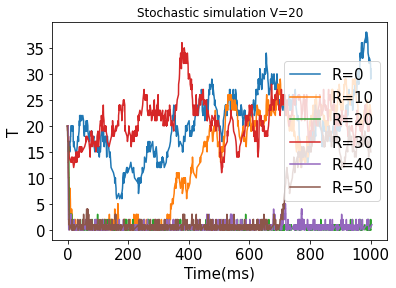

In [24]:
#def stochas_KH(V_val,H_val,K_val,T_val):

for Hval in range(0,60,10):
    stochas_KH(20,Hval,20,1000)
#plt.ylim(0,50)
plt.title('Stochastic simulation V=20')
plt.xlabel('Time(ms)',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.show()

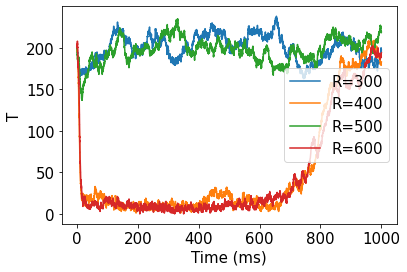

In [23]:
#def stochas_KH(V_val,H_val,K_val,T_val):

for Hval in range(300,700,100):
    stochas_KH(200,Hval,200,1000)
#plt.ylim(0,250)
#plt.title('Stochastic simulation V=200')
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend(loc='center right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Plotting data from xppaut (Stochastic simulation)

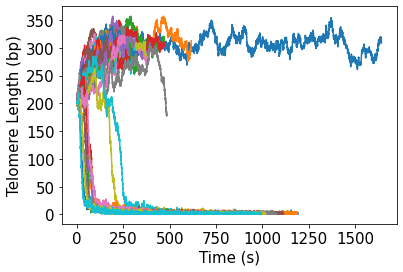

In [46]:
dft = pd.read_csv('tyson_curve_30i.dat', sep='\s+',names=['TR','K'])
#dft.plot(x='TR',y='K')
#plt.show()

dftr = dft[dft['TR']==0]
ind_tr = dftr.index
#lastK_val = []
#print(ind_tr)
ax = plt.gca()
for i in range(len(ind_tr)-1):
    dptemp = dft[ind_tr[i]:ind_tr[i+1]-1]
    #print(ind_tr[i])
    #print(dptemp)
#    plt.plot(dptemp)
    dptemp.plot(x='TR',y='K',ax=ax,legend=None)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Using XppAut transient

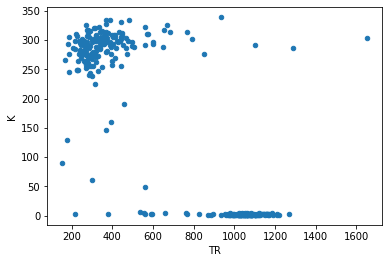

In [47]:
df_transient = pd.read_csv('tyson_transient_data_300i.dat', sep='\s+',names=['TR','K'])
df_transient.plot(kind='scatter',x='TR',y='K')
plt.show()

### 300 iterations

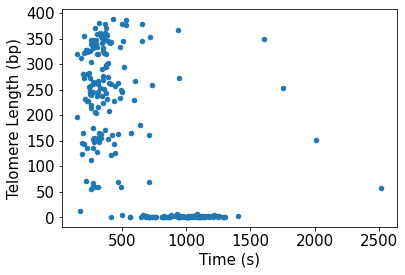

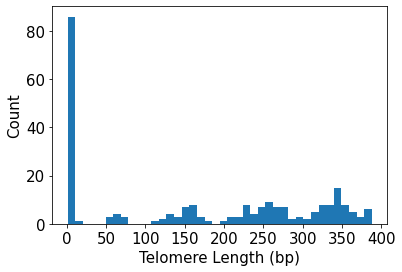

In [50]:
df_trans2_300i = pd.read_csv('tyson_trans_2par_30i.dat', sep='\s+',names=['TR','K'])
df_trans2_300i.plot(kind='scatter',x='TR',y='K')
plt.ylabel('Telomere Length (bp)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.hist(df_trans2_300i['K'],40)
#plt.title('Histogram',,fontsize=15)
plt.xlabel('Telomere Length (bp)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()